## Take cloud of points and rotate it 
### At first we would like to take a set of points defining a cloud pf points called matrix P 

In [1]:
# import libraries
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from numpy.linalg import svd

In [2]:
def P_shape(file_name):
    df=pd.read_excel(file_name)
    df=df.dropna(axis=0)
    df=df.drop(['Count','Name'],axis=1)
    P=df.to_numpy(dtype ='int')
    return P

In [3]:
def plot_P_shape(P,range_of_random_points=500):

    x_P= [i[0] for i in P]
    x_P= (np.array)(x_P)

    y_P= [i[1] for i in P]
    y_P= (np.array)(y_P)

    plt.axis((-range_of_random_points,range_of_random_points,-range_of_random_points,range_of_random_points))
    plot(x_P, y_P, 'go')
def plot_P_Q_shape(P,Q,range_of_random_points=500):
    
    x_P= [i[0] for i in P]
    x_P= (np.array)(x_P)

    y_P= [i[1] for i in P]
    y_P= (np.array)(y_P)
    
    x_Q= [i[0] for i in Q]
    x_Q= (np.array)(x_Q)

    y_Q= [i[1] for i in Q]
    y_Q= (np.array)(y_Q)
    
    plt.axis((-range_of_random_points,range_of_random_points,-range_of_random_points,range_of_random_points))
    plot(x_P, y_P, 'go', x_Q, y_Q, 'bo')
    
   

    


In [4]:
def calculate_Q_matrix(P,theta1,T):
        # define angle and R
    scos=lambda theta: sp.N(sp.cos(theta))
    ssin=lambda theta: sp.N(sp.sin(theta))

    def angle(num):
        #  counterclockwise- positive angle 
        if(num > 0):
            return(sp.pi/num)
        #  clockwise- negative angle
        return((2*sp.pi)+(sp.pi/num))

    theta = angle(theta1) # positive angle(counter-clockwise rotation), negative angle(clockwise)
    c = scos(theta)
    s=  ssin(theta)

    R = np.array(((c, -s), (s, c)))
    print('Rotation matrix:')
    print(R)

    # Data after the rotation
    Q = np.zeros((P.shape[0],P.shape[1]))

    for i in range(P.shape[0]):
        x=R.dot(P[i].reshape(2,1))+T.reshape(2,1)
        Q=np.append(Q,x.reshape(1,2),axis=0)

    # delete the first insertion dot (0,0)
    Q= np.delete(Q, np.s_[0:P.shape[0]], axis = 0)

    print("Shape of Q Matrix:", Q.shape)
    
    return Q


In [5]:
def Rigid_Motion(P,Q):
    
    #Step 1: Compute the weighted centroids of both point sets
    centroid_P=np.mean(P,axis=0)
    centroid_Q=np.mean(Q,axis=0)
    centroid_P=centroid_P.reshape(2,1)
    centroid_Q=centroid_Q.reshape(2,1)

    centroid_P=centroid_P.astype(float)
    centroid_Q=centroid_Q.astype(float)
    # extend the centroid to the same shape of matrix  P____________________________________
    centroid_P_Matrix=centroid_P.T
    concat_P=centroid_P_Matrix[0].reshape(1,2)
    print("The centroid of P Matrix: {} with shape:{}".format(centroid_P,centroid_P.shape))
    print("The centroid of Q Matrix: {} with shape:{}".format(centroid_Q,centroid_Q.shape))

    for i in range(P.shape[0]-1):
        centroid_P_Matrix=np.append(centroid_P_Matrix,concat_P,axis = 0)
    centroid_P_Matrix=(np.array)(centroid_P_Matrix)
    centroid_P_Matrix=centroid_P_Matrix.astype(float)
    print("Shape centroid_P_Matrix:\n",centroid_P_Matrix.shape)

    # extend the centroid to the same shape of matrix  Q____________________________________
    centroid_Q_Matrix=centroid_Q.T
    concat_Q=centroid_Q_Matrix[0].reshape(1,2)
    for i in range(Q.shape[0]-1):
        centroid_Q_Matrix=np.append(centroid_Q_Matrix,concat_Q,axis = 0)
    centroid_Q_Matrix=(np.array)(centroid_Q_Matrix)
    centroid_Q_Matrix=centroid_Q_Matrix.astype(float) 
    print("Shape centroid_Q_Matrix:\n",centroid_Q_Matrix.shape)
    
    #calculate the centerd
    centered_P= P-centroid_P_Matrix
    centered_Q= Q-centroid_Q_Matrix

    centered_P=centered_P.astype(float)
    centered_Q=centered_Q.astype(float)

    print("centered_P Shape: ",centered_P.shape)
    print("centered_Q Shape: ", centered_Q.shape)

    
    #Step 3: Compute the d × d covariance matrix
    W= np.eye(P.shape[0],P.shape[0])

    print("centered_P: ",centered_P.shape)
    print("centered_Q: ", centered_Q.T.shape)
    S= np.dot(np.dot(centered_P.transpose(), W), centered_Q)
    S=S.astype(float)

    print("S Matrix:" ,S)
    print("S shape:" ,S.shape)

    U, sigma, V= svd(S)
    M= np.eye(P.shape[1],P.shape[1])
    R1= ((V).dot(M)).dot(U.T)


    print("The Rotation Matrix according to the algorithm: ")
    print(np.array2string(R1, formatter={'float_kind': '{0:.3f}'.format}))
    
    #5. Compute the optimal translation
    t=centroid_Q-(R1.dot(centroid_P))

    print("The transletion according to the algorithm: ")
    print(np.array2string(t, formatter={'float_kind': '{0:.3f}'.format}))
    


### Let's perform a rigid rotation transformation on P

To do that we will need several things: 

1) The point at which the rotation is performed

2) The angle - positive angle(clockwise rotation), negative angle(counter-clockwise)

3) The location we would like to reach
 
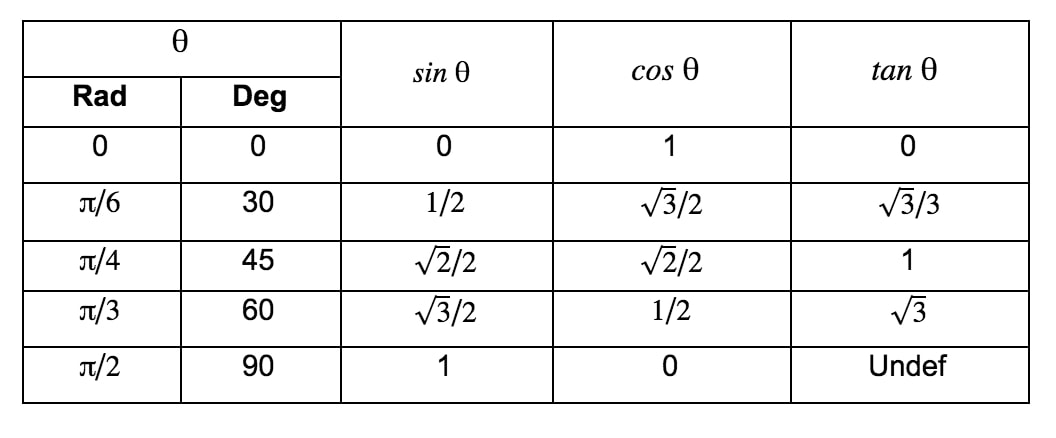 

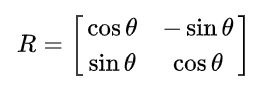

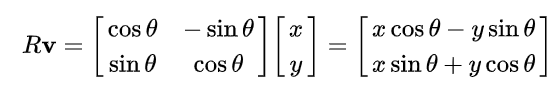

P.shape (200, 2)


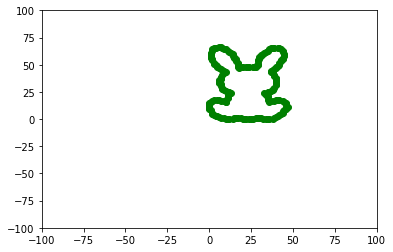

In [12]:
file_name="Drawing1.xls"
P=P_shape(file_name)
T=np.array([-99,30])
range_of_random_points=100
plot_P_shape(P,range_of_random_points)

theta1=-6

print("P.shape",P.shape)


Rotation matrix:
[[0.866025403784439 0.500000000000000]
 [-0.500000000000000 0.866025403784439]]
Shape of Q Matrix: (200, 2)
the Transletion: [-99  30]
The centroid of P Matrix: [[22.915]
 [32.855]] with shape:(2, 1)
The centroid of Q Matrix: [[-62.72752787]
 [ 46.99576464]] with shape:(2, 1)
Shape centroid_P_Matrix:
 (200, 2)
Shape centroid_Q_Matrix:
 (200, 2)
centered_P Shape:  (200, 2)
centered_Q Shape:  (200, 2)
centered_P:  (200, 2)
centered_Q:  (2, 200)
S Matrix: [[ 41378.27326011 -24625.83838402]
 [ 48380.33661598  85072.13110616]]
S shape: (2, 2)
The Rotation Matrix according to the algorithm: 
[[0.866 0.500]
 [-0.500 0.866]]
The transletion according to the algorithm: 
[[-99.000]
 [30.000]]


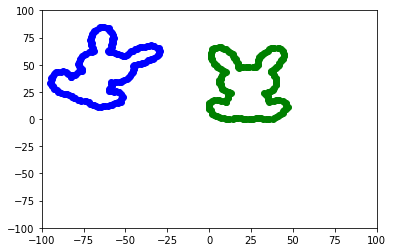

In [13]:
Q=calculate_Q_matrix(P,theta1,T)
plot_P_Q_shape(P,Q,range_of_random_points)
print("the Transletion:",T)

Rigid_Motion(P,Q)